# Online Purchase Intention Analysis
This analysis aims to examine online users’ purchase intentions by evaluating their navigation behavior on the company website. The dataset comprises 12,330 observations, each representing a unique user session collected over the span of one year. This temporal scope minimizes potential biases associated with specific marketing campaigns, holidays, user profiles, or seasonal effects. The dataset includes 10 numerical features and 8 categorical variables.

The objective of this analysis is to determine the optimal classification model for the dataset and to quantify the contribution of each feature to the model’s predictive performance.

[Dataset Source](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

[Data Dictionary](https://www.stat.cmu.edu/capstoneresearch/fall2022/315files_f22/team4.html?utm_source=chatgpt.com)


#### Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\haley\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\haley\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\haley\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\haley\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\haley\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\haley\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\haley\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\haley\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



#### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\haley\OneDrive\Documents\GitHub Projects\Online Purchase Intention\online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Preprocessing

In [3]:
#remove null values
df = df.dropna()

In [4]:
#create month numbers
month_to_num = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6,
                'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df['Month_num'] = df['Month'].map(month_to_num)

## Exploratory Analysis

##### User Purchases
1908 website users out of 12,330 total users made a purchase on the website. This is a **15.47% conversion rate** overall.

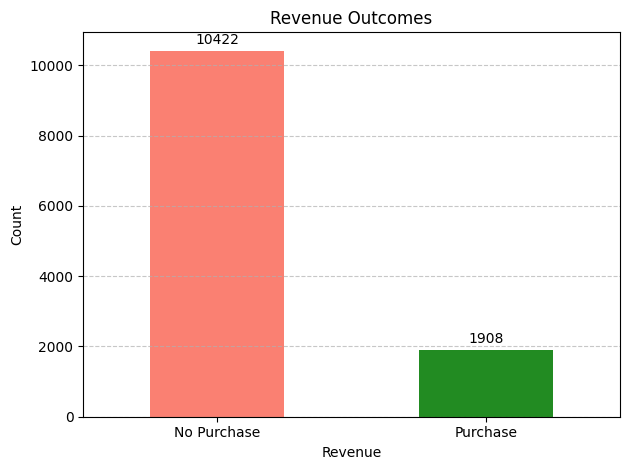

In [5]:
#basic value counts
revenue_counts = df['Revenue'].value_counts()

revenue_counts.plot(kind='bar', color=['salmon','forestgreen'])

plt.title('Revenue Outcomes')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Purchase', 'Purchase'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(revenue_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Purchases by Day of Week
The dataset identifies if a visit and purchase was made on a weekday or weekend.
_Key Takeaways:_ Most visits and purchases occur on weekdays. However, there is a slightly higher conversion rate (17.39%) on weekends compared to weekdays (14.89%).

In [6]:
count_df = df.groupby(['Weekend', 'Revenue']).size().unstack(fill_value=0)
count_df

Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


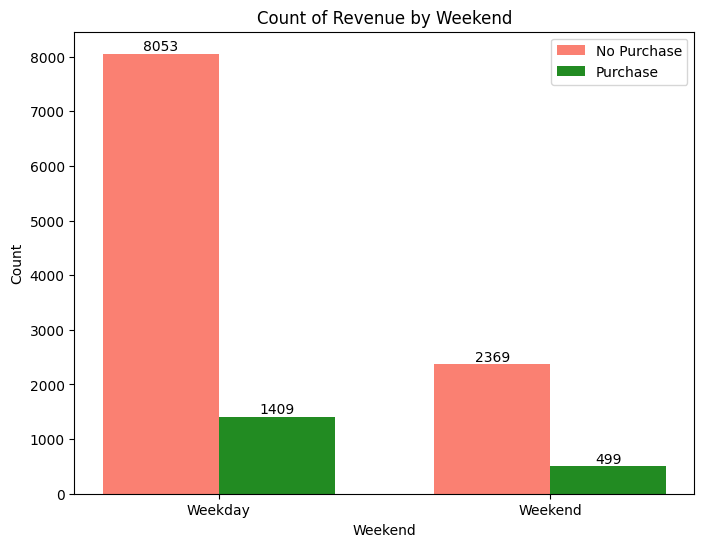

In [7]:
labels = ['Weekday', 'Weekend']
revenue_true = count_df[True].values
revenue_false = count_df[False].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(x - width/2, revenue_false, width, label='No Purchase', color='salmon')
bar2 = ax.bar(x + width/2, revenue_true, width, label='Purchase', color='forestgreen')

#labels
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )

ax.set_xlabel('Weekend')
ax.set_ylabel('Count')
ax.set_title('Count of Revenue by Weekend')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

##### Purchases by Month
There are significant spikes in user visits during May and November. Although May experienced a high volume of traffic with approximately 3,400 users, only around 400 users completed a purchase. In contrast, November recorded the highest number of purchasing users, with approximately 750 transactions.

_Key Takeaways:_ The highest sales are observed in November, likely influenced by the pre-holiday shopping season. While user traffic is also elevated in May, it does not translate into a proportionally higher number of purchases, indicating lower conversion efficiency during that period.

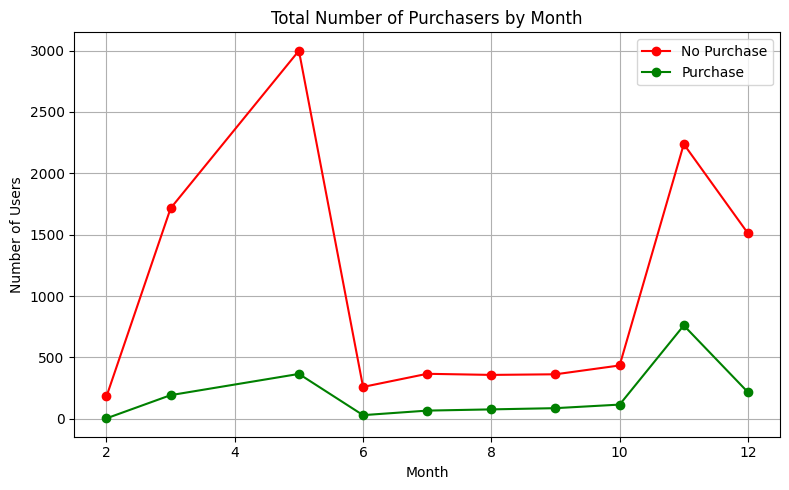

In [8]:
counts = df.groupby(['Month_num', 'Revenue']).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
plt.plot(counts.index, counts[False], marker='o', color='red', label='No Purchase')
plt.plot(counts.index, counts[True], marker='o', color='green', label='Purchase')

plt.title('Total Number of Purchasers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Purchases by Region
Regions 1 and 3 account for the majority of both web traffic and purchases. The distribution of web traffic across regions closely mirrors the distribution of purchasing behavior, indicating consistency between user visits and conversion by region.

_Key Takeaways:_ Region 1 and 3 have the highest web traffic and sales.

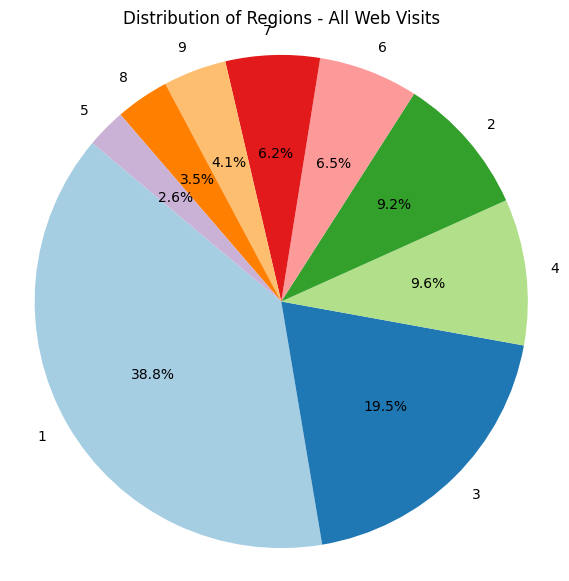

In [9]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Regions - All Web Visits')
plt.axis('equal')
plt.show()

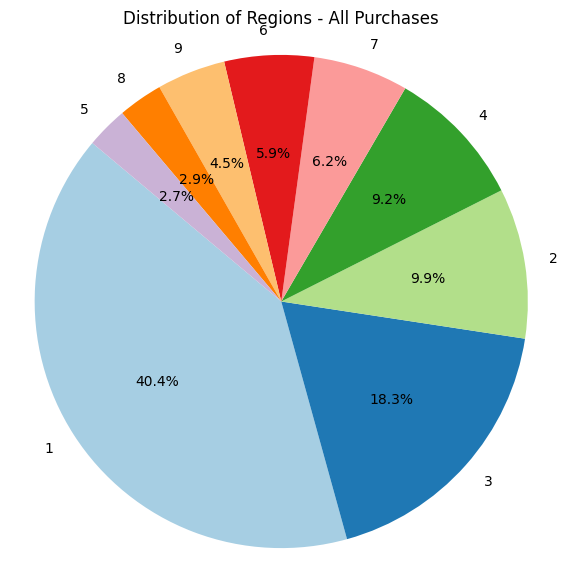

In [10]:
df_revenue_true = df[df['Revenue'] == True]
region_counts = df_revenue_true['Region'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Regions - All Purchases')
plt.axis('equal')
plt.show()

##### Purchases by Traffic Type
Traffic type 2, 1, and 3 are the most popular traffic types by far. Unfortunately, the dataset does not specify what these traffic types are.

_Key Takeaways:_ Many web visits come from traffic sources 2, 1, and 3. The company should continue to pursue ads in these traffic sources and reconsider funding other traffic sources.

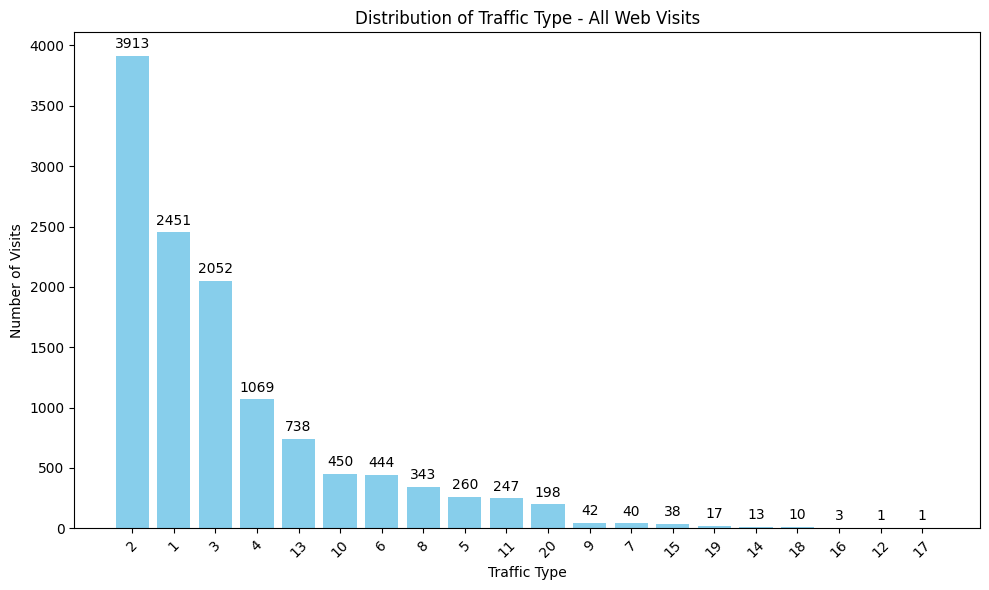

In [11]:
traffic_counts = df['TrafficType'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(traffic_counts.index.astype(str), traffic_counts.values, color='skyblue')

for i, v in enumerate(traffic_counts.values):
    plt.text(i, v + max(traffic_counts.values)*0.01, str(v), ha='center', va='bottom')

plt.xlabel('Traffic Type')
plt.ylabel('Number of Visits')
plt.title('Distribution of Traffic Type - All Web Visits')
plt.xticks(rotation=45)
plt.tight_layout()

##### Purchases by Browser Type
Browser types 2, 1, abd 4 have the most web traffic to the website. Unfortunately, the dataset does not specify what each browser type is.

_Key Takeaways:_ Focus on developing better UI and catering to users using browser type 2, 1, and 4. A friendlier user experience could lead to less barriers to purchase.

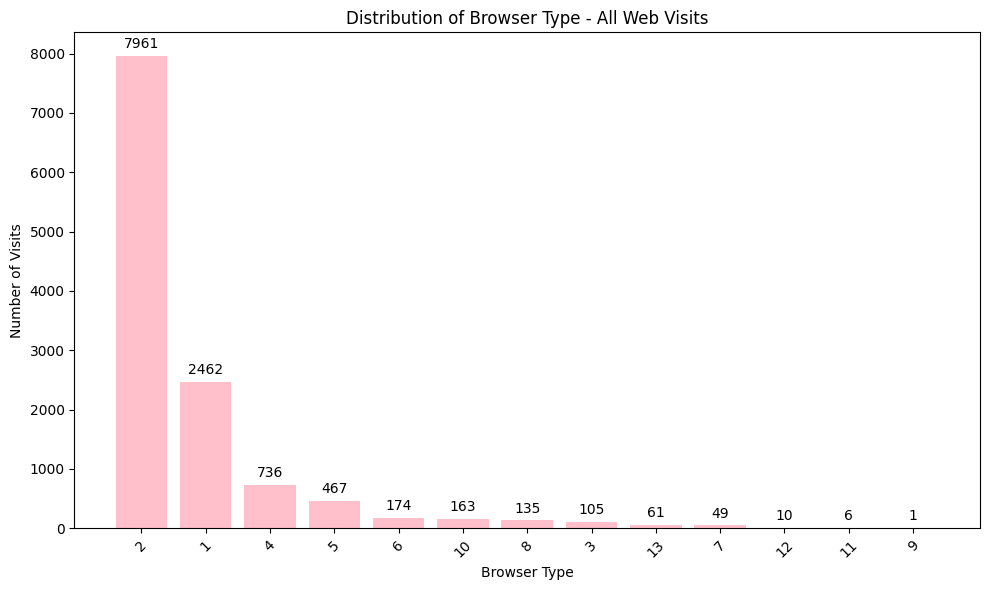

In [12]:
browser_counts = df['Browser'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(browser_counts.index.astype(str), browser_counts.values, color='pink')

for i, v in enumerate(browser_counts.values):
    plt.text(i, v + max(browser_counts.values)*0.01, str(v), ha='center', va='bottom')

plt.xlabel('Browser Type')
plt.ylabel('Number of Visits')
plt.title('Distribution of Browser Type - All Web Visits')
plt.xticks(rotation=45)
plt.tight_layout()

##### Exit vs Bounce Rate
An Exit Rate is the percentage of sessions that end on a specific page, regardless of how many pages were visited before it. Similarly, the Bounce Rate is the percentage of sessions where a user lands on a page and leaves without futher interaction. A Bounce Rate is page-entry specific and an Exit Rate is page-exit specific.

There is often a correlation between Bounce Rate and Exit Rate. High values for both may suggest the page isn’t engaging or relevant. A high Exit Rate with a low Bounce Rate can indicate the page is a natural endpoint, like a confirmation page. While all bounces are exits, not all exits are bounces—so context matters. Analyzing both together helps reveal whether a page is losing user interest or fulfilling its purpose.

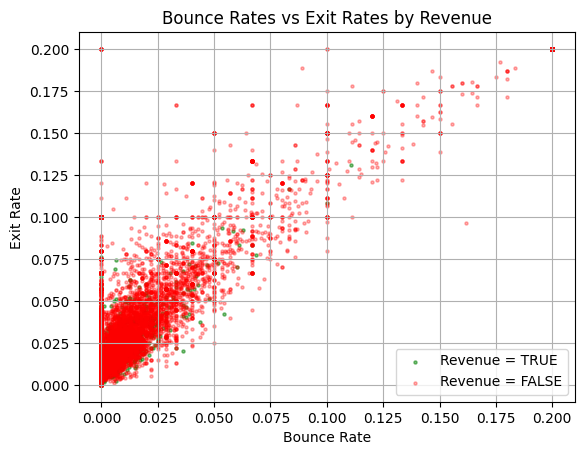

In [13]:
#plot visits that led to purchases
plt.scatter(df[df['Revenue'] == True]['BounceRates'],
            df[df['Revenue'] == True]['ExitRates'],
            color='green', label='Revenue = TRUE', alpha=0.5, s=5)

#plot visits that did not lead to purchases
plt.scatter(df[df['Revenue'] == False]['BounceRates'],
            df[df['Revenue'] == False]['ExitRates'],
            color='red', label='Revenue = FALSE', alpha=0.3, s=5)

plt.title('Bounce Rates vs Exit Rates by Revenue')
plt.xlabel('Bounce Rate')
plt.ylabel('Exit Rate')
plt.legend()
plt.grid(True)
plt.show()

##### Site Visits by New vs Returning Users
There is a substantially higher number of returning visitors compared to new visitors, indicating that users tend to visit the site multiple times prior to making a purchase.

_Key Takeaways:_ Returning visitor traffic peaks notably in May and November, mirroring previously observed purchasing trends.

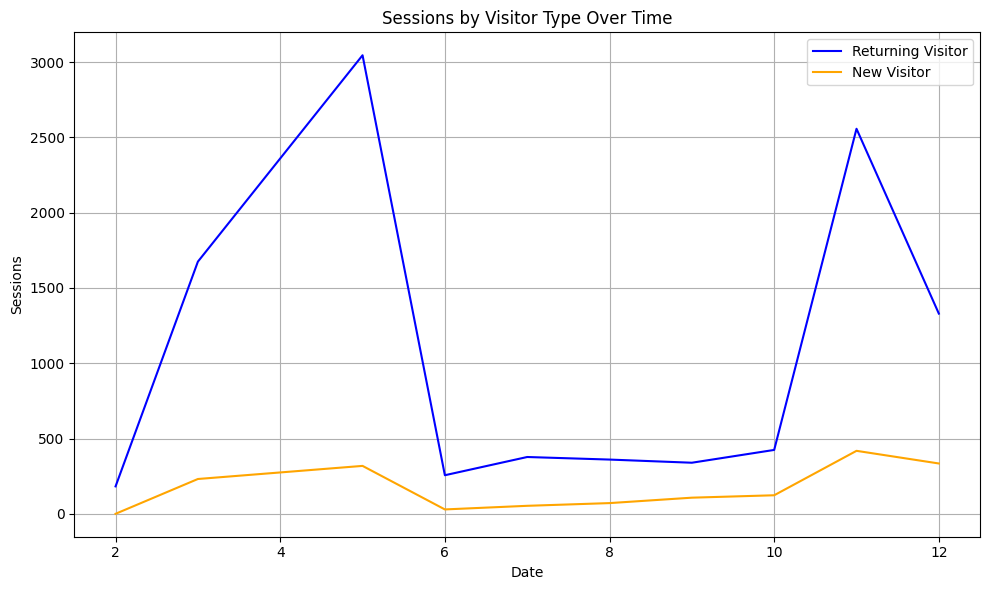

In [14]:
counts = df.groupby(['Month_num', 'VisitorType']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts['Returning_Visitor'], label='Returning Visitor', color='blue')
plt.plot(counts.index, counts['New_Visitor'], label='New Visitor', color='orange')

# Chart customization
plt.title('Sessions by Visitor Type Over Time')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Numerical Variables
The ProductRelated_Duration, BounceRates, and ExitRates are all right skewed. Exit and Bounce rates have a series of outliers on the high end near 2.0.

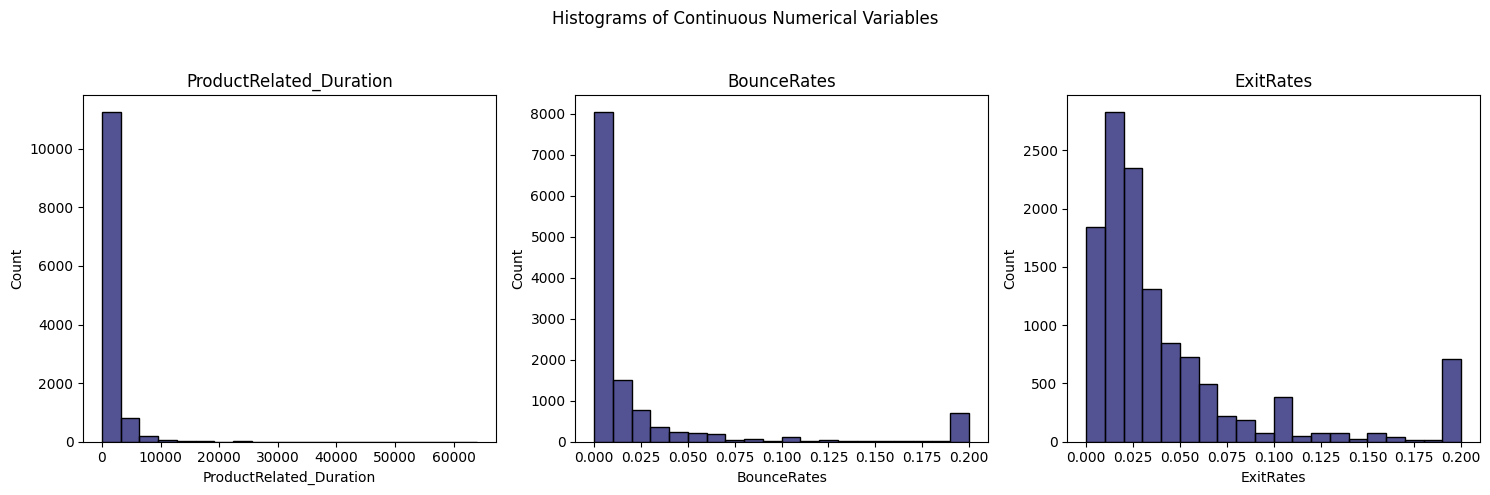

In [15]:
numerical_cols = ['ProductRelated_Duration', 'BounceRates', 'ExitRates']  
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle('Histograms of Continuous Numerical Variables')
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, bins=20, ax=axes[i],color="midnightblue")
    axes[i].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Feature Correlation
Exit Rate and Bounce Rate exhibit a strong positive correlation of 0.91, which aligns with expectations given their related behavioral context. Page Type and the time spent on that page (e.g., Informational and Informational_Duration) also show a high correlation, indicating that users tend to spend consistent amounts of time based on the type of content.

Administrative-related pages show a moderate negative correlation with both Exit and Bounce Rates, ranging from -0.14 to -0.32, suggesting users are less likely to exit or bounce from these pages. Additionally, Special Day and Month demonstrate a negative correlation of -0.26, potentially reflecting seasonal or promotional timing effects.

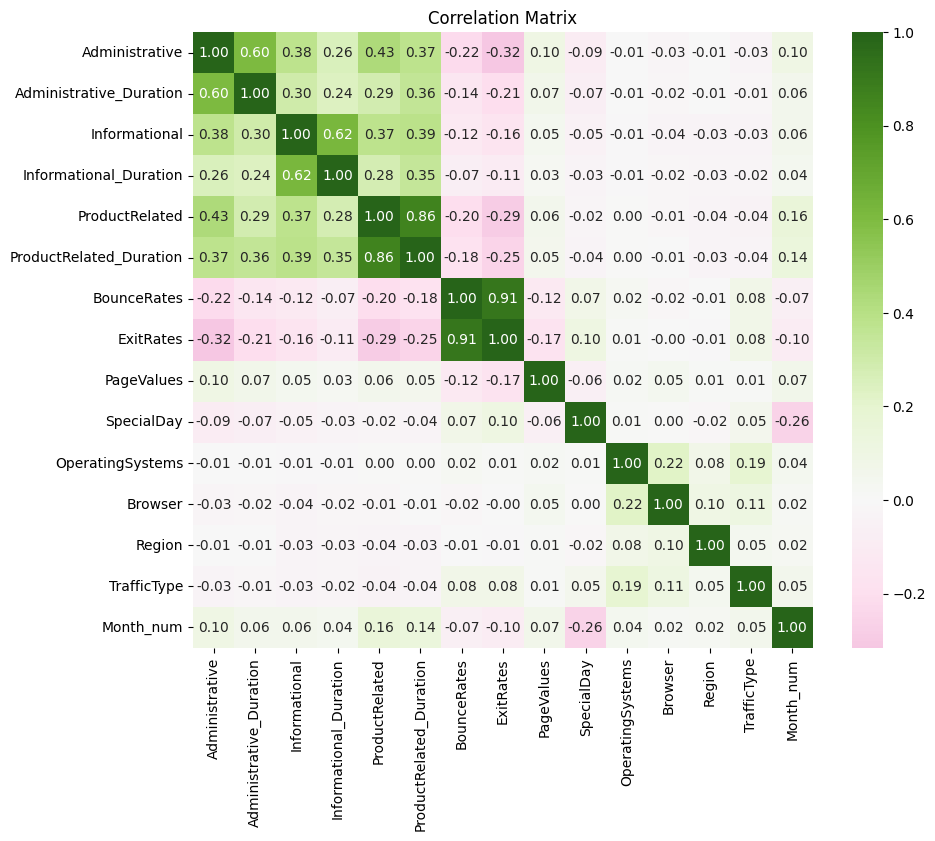

In [16]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='PiYG', center=0)
plt.title('Correlation Matrix')
plt.show()

## Preprocess Data
MLabelEncoder assigns integers to categories, implying an order and distance that can mislead models like KNN and Logistic Regression, which rely on distances or linear relationships. OneHotEncoder avoids this by creating binary features for each category without implying order, making it better for those models. Tree-based models like Random Forest and XGBoost don’t assume any order, so LabelEncoder works well for them since they treat categories as distinct groups.

For both types of encoding, boolean columns TRUE/FALSE will automatically be treated like 1 and 0.

In [17]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)
#df.head()

##### OneHotEncoder for Logistic Regression and KNN Models

In [18]:
from sklearn.preprocessing import OneHotEncoder

#all categorical variables (Weekend and Revenue has already been converted to integers because they are just boolean.)
cat_cols = ['Month', 'VisitorType','TrafficType', 'Region', 'Browser', 'OperatingSystems']

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_array = onehot.fit_transform(df[cat_cols])

ohe_df = pd.DataFrame(onehot_array, columns=onehot.get_feature_names_out(cat_cols))

df_ohe = df.drop(columns=cat_cols).reset_index(drop=True)
df_ohe = pd.concat([df_ohe, ohe_df.reset_index(drop=True)], axis=1)

In [19]:
df_ohe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_12,Browser_13,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##### LabelEncoder for RandomForest and XGBoost Models

In [20]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [21]:
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

In [22]:
df_le = df.copy()

for col in non_numeric_cols:
    df_le[col] = label_encoder(df_le[col])

Month ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
VisitorType ['New_Visitor' 'Other' 'Returning_Visitor']


In [23]:
df_le.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_num
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0,2


## Classification Model
I am building multiple models and testing which is the best at classifying if a user will make a purchase or not.

**Logistic Regression** is a straightforward and interpretable model that performs well on smaller, structured datasets, especially when the relationship between features and the target is approximately linear. It is computationally efficient, easy to implement, and provides probabilistic outputs, making it ideal for binary classification tasks where explainability is important. **Uses OneHotEncoder.**  _Concern: Logistic Regression does not work best with complex nonlinear datasets._

**Random Forest** is ideal for tabular data, offering strong performance, robustness to noise and missing values, and feature importance for interpretability. It reduces overfitting compared to single trees but isn’t suited for real-time use or unstructured data like text or images. **Uses LabelEncoder.**  _Concern: Random Forest may perform suboptimally on highly imbalanced datasets such as this one._

**XGBoost** is a high-performance model optimized for speed and memory efficiency. It handles tabular data with both numerical and categorical features, captures complex nonlinear relationships, and provides valuable insights into feature importance for explainability. **Uses LabelEncoder.**  _Concern: Our dataset is relatively small, consisting of 12,330 records, whereas XGBoost typically demonstrates superior performance on larger, more complex datasets._

**K-Nearest Neighbors (KNN)** performs well on datasets with nonlinear relationships and irregular decision boundaries. KNN allows for flexibly to adapt to complex local patterns based solely on the proximity of observations in feature space. It is particularly well-suited for smaller datasets with low dimensionality. **Uses OneHotEncoder.**  _Concern: KNN does not produce model coefficients or offer intrinsic measures of feature importance, limiting its utility for interpretability and explanatory analysis._

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#### OneHotEncode Models

In [25]:
x = df_ohe.drop('Revenue', axis=1)
y = df_ohe['Revenue']

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20)

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)

#prediction
y_pred_lr = lr.predict(x_test_scaled)

##### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

#prediction
y_pred_knn = knn.predict(x_test_scaled)

#### LabelEncoder Models

In [32]:
x = df_le.drop('Revenue', axis=1)
y = df_le['Revenue']

In [33]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20)

##### RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

#prediction
y_pred_rf = rf.predict(x_test)

##### XGBoost

In [36]:
from xgboost import XGBClassifier

In [37]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(x_train, y_train)

#prediction
y_pred_xgb = xgb.predict(x_test)

# Best Model

The **RandomForest model performed the best** with an accuracy score of **90.3%**.

##### Accuracy Score

In [38]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

Logistic Regression Accuracy: 0.7927818329278183
KNN Accuracy: 0.810624493106245
Random Forest Accuracy: 0.902676399026764
XGBoost Accuracy: 0.8969991889699919


#### Confusion Matrix

- True 0 - Predicted 0 = True Positive
- True 1 - Predicted 0 = False Positive
- True 0 - Predicted 1 = False Negative
- True 1 - Predicted 1 = True Negative

The Random Forest performed the best (had the highst accuracy score). It predicted 2017 True Positives and 209 True Negatives correctly.

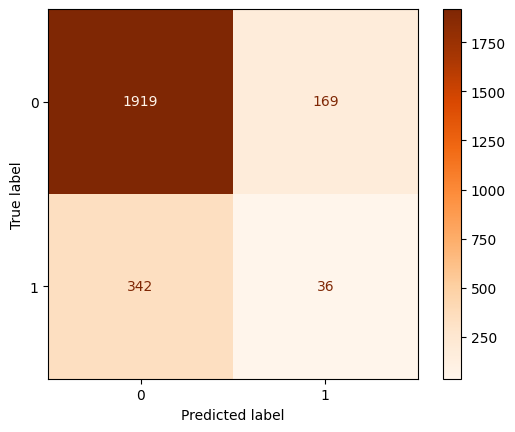

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Oranges')

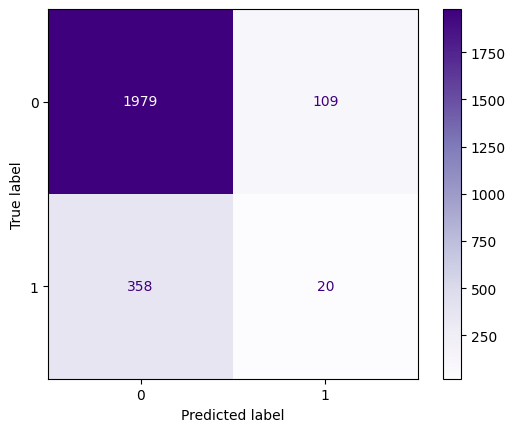

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Purples')

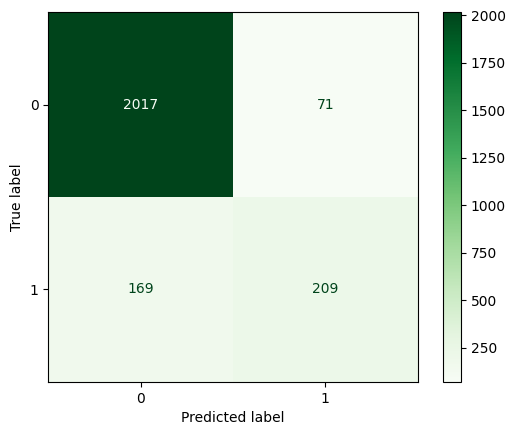

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')

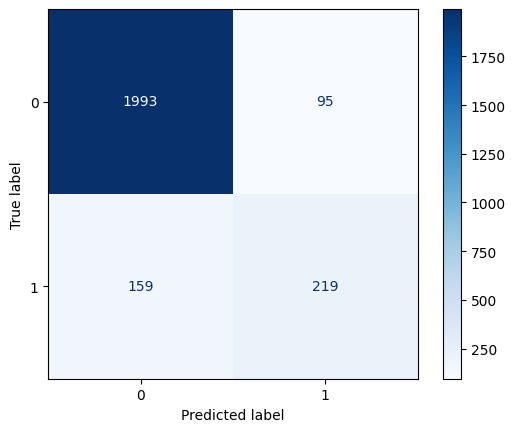

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap='Blues')

##### Feature Importance
Feature importance measures the relative contribution of each variable to the model’s predictions. In the Random Forest model, Page Values exhibited the greatest influence, accounting for 37.9% of the predictive power. Exit Rates and Product-Related Duration also demonstrated strong importance scores. In contrast, Visitor Type, Weekend, and Special Day had the least impact on predicting whether a visitor completes a purchase.

In [43]:
importances = rf.feature_importances_

# Match to column names
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# Sort descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                    Feature  Importance
8                PageValues    0.378964
7                 ExitRates    0.090488
5   ProductRelated_Duration    0.085302
4            ProductRelated    0.071843
6               BounceRates    0.056693
1   Administrative_Duration    0.053226
0            Administrative    0.042393
14              TrafficType    0.029687
13                   Region    0.028608
17                Month_num    0.028217
10                    Month    0.027586
3    Informational_Duration    0.026541
12                  Browser    0.019812
11         OperatingSystems    0.018214
2             Informational    0.017814
15              VisitorType    0.011103
16                  Weekend    0.010465
9                SpecialDay    0.003045


##### ROC-AUC
The ROC curve (Receiver Operating Characteristic curve) is a visual tool that measures how well the model ranks positive cases higher than negative cases across all possible thresholds.

The ROC curve plots:
- True Positive Rate (TPR) = Sensitivity = Recall
- TPR = TP / (TP + FN)
- False Positive Rate (FPR)
- FPR = FP / (FP + TN)

X-axis: FPR (False Positive Rate)
Y-axis: TPR (True Positive Rate)

AUC Score	Interpretation
- 0.90–1.0	Excellent
- 0.80–0.89	Very good
- 0.70–0.79	Fair
- 0.60–0.69	Poor
- 0.50	No skill (random guessing)

The RandomForest Model has an excellent ROC-AUC score of 92.05%! This means our model does a great job distinguishing between positive and negative classes.

ROC-AUC Score: 0.9205


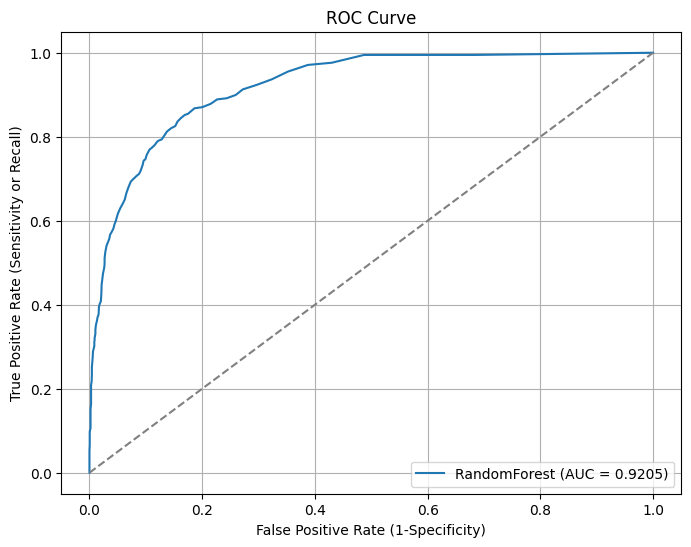

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

#get predicted probabilities for the positive class (class 1)
y_proba_rf = rf.predict_proba(x_test)[:, 1] #note, the x_train is from the label encoded data!

roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")

#get the false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"RandomForest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal baseline
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity or Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


# Conclusions
- The **RandomForest model performed the best.**
- It is highly accurate with a 90.3% accuracy score and a 92.05% ROC-AUC score.
- Page Values, Exit Rates, and Product Related Duration have the highest impact on whether a customer will make a purchase on the website.